In [ ]:
import os
import re
from pathlib import Path

import numpy as np
import pandas as pd
import shap

from run1.lib.utils import MyUtil

In [ ]:
CURRENT_DIR = Path.cwd()  # Current directory of the running file

CURRENT_DIR: c:\Users\admin\Coding\research\weld-ml\run1\P02_MF_1\T24_shap_tabFPN
DATA_DIR: c:\Users\admin\Coding\research\weld-ml\run1\data
STUDY_DIR: c:\Users\admin\Coding\research\weld-ml\run1\P01_no_af\T11_tabPFN
dt: 2026-01-29_14-57


In [3]:
OUTDIR = CURRENT_DIR / "S01"
os.makedirs(OUTDIR, exist_ok=True)

In [4]:
filenames = [f for f in os.listdir(OUTDIR)]
print(f"Found {len(filenames)} files:")
print(filenames)


Found 3 files:
['batch_0.pkl', 'batch_1.pkl', 'batch_2.pkl']


In [5]:
shap_values_list = []
for filename in os.listdir(OUTDIR):
    print(f"Loading {filename}...")
    data = MyUtil.load_data(OUTDIR / filename)
    shap_values_list.append(data["shap_values"])

Loading batch_0.pkl...
Loading batch_1.pkl...
Loading batch_2.pkl...


In [6]:
# Combine SHAP values
feature_names = shap_values_list[0].feature_names

# Combine values
combined_shape_values = np.vstack([sv.values for sv in shap_values_list])
combined_shape_values.shape

# Combine base values
combined_base_values = np.concatenate([sv.base_values for sv in shap_values_list])
combined_base_values.shape

# Combine data (feature values)
combined_data = np.vstack([sv.data for sv in shap_values_list])
combined_data.shape

(9, 32)

In [7]:
shap_values = shap.Explanation(
    values=combined_shape_values, 
    base_values=combined_base_values,
    data=combined_data,
    feature_names=shap_values_list[0].feature_names,
)

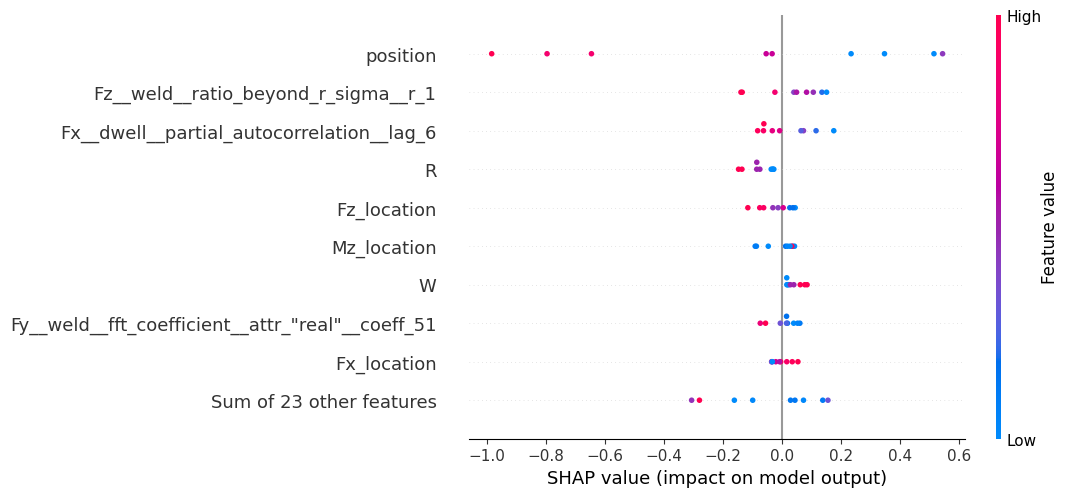

In [8]:
shap.plots.beeswarm(shap_values)

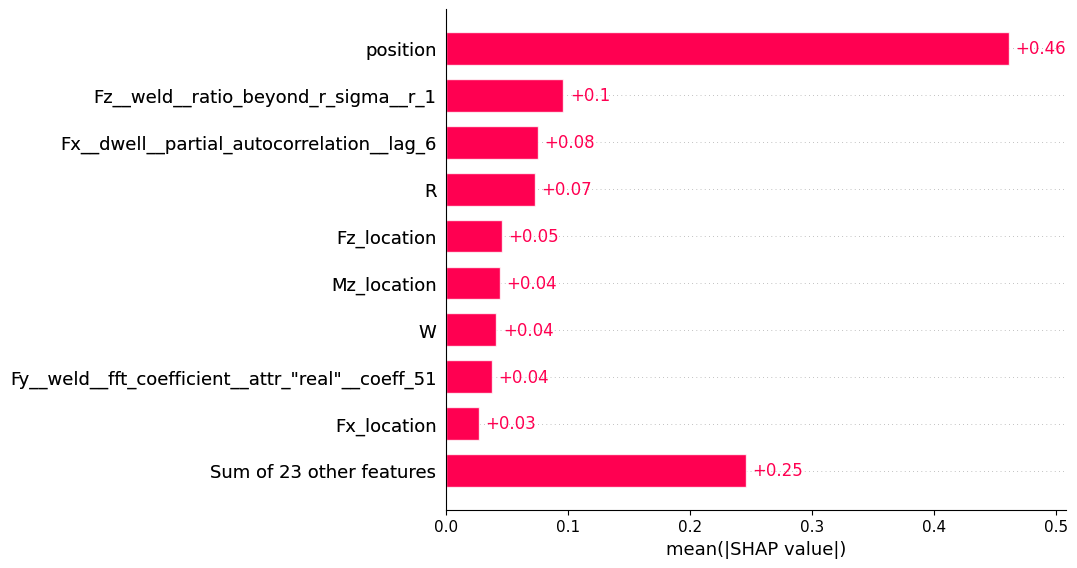

In [9]:
# Plot SHAP bar plot
shap.plots.bar(shap_values)

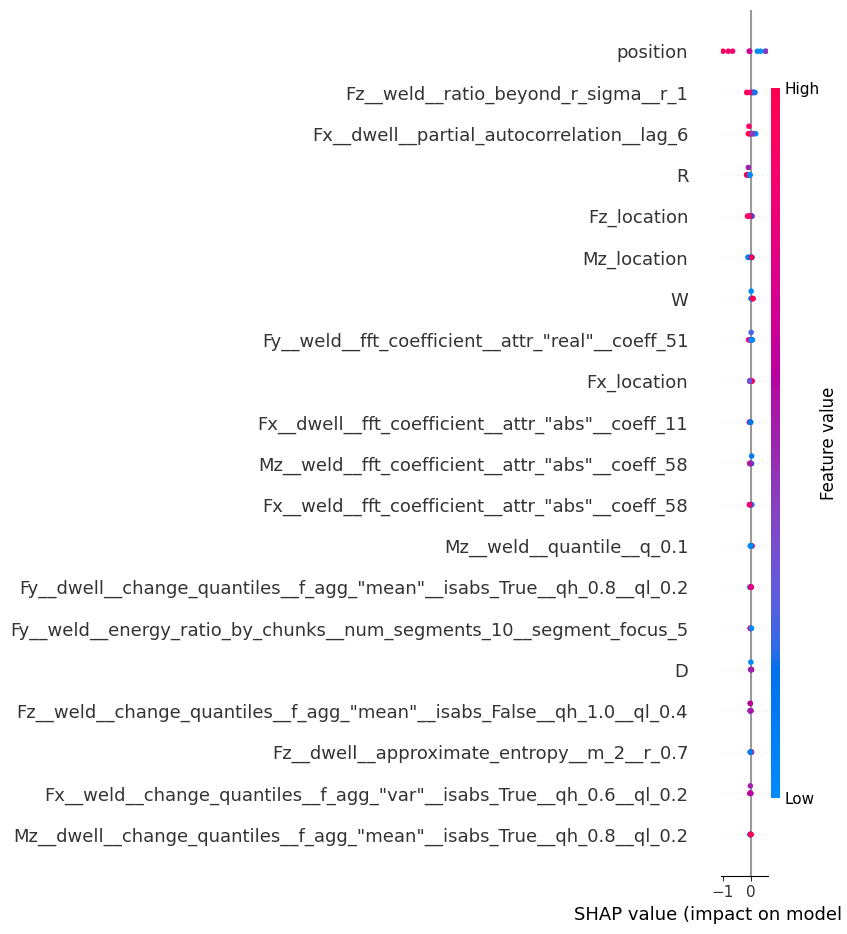

In [10]:
# Plot SHAP summary plot with feature names
shap.summary_plot(shap_values)